In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2020 = pd.read_csv('IT Salary Survey EU  2020.csv')
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


In [3]:
df_2020.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


## We are going to divide categories and numeical features differently for our use in future analysis

In [4]:
df_2020.rename(columns = {'Position ':'Position'}, inplace = True)

In [5]:
# features we ignore in the following
features_not_used = ['Timestamp',
                     'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                     'Annual bonus+stocks one year ago. Only answer if staying in same country']

In [6]:
# categorical features
features_cat = ['Gender', 'City', 'Position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Number of vacation days',
       'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [7]:
# numeric features
features_num = ['Age',
                'Yearly brutto salary (without bonus and stocks) in EUR',
                'Yearly bonus + stocks in EUR',]

## Data cleansing

In [8]:
# fill missing values

# >>> categorical features
missing_text = '_MISSING_'
df_2020[features_cat] = df_2020[features_cat].fillna(missing_text)

# >>> numerical features
missing_num = -1
df_2020[features_num] = df_2020[features_num].fillna(missing_num)

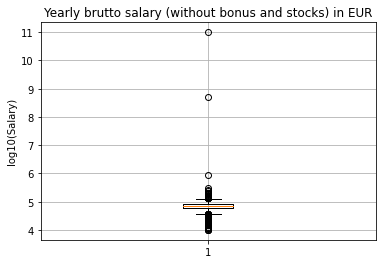

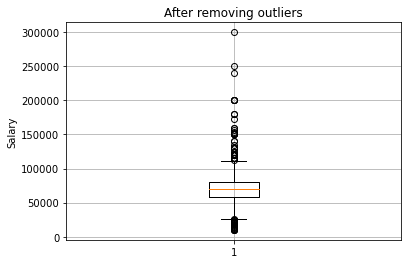

In [9]:
# check for outliers
plt.boxplot(np.log10(df_2020['Yearly brutto salary (without bonus and stocks) in EUR']))
plt.title('Yearly brutto salary (without bonus and stocks) in EUR')
plt.ylabel('log10(Salary)')
plt.grid()
plt.show()

# remove very high values
cut_point = 500000
df_2020 = df_2020[df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] <= cut_point]
plt.boxplot(df_2020['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.title('After removing outliers')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [10]:
# string cleaning (remove redundant spaces and convert to upper case)
# => reduce risk of "hidden" duplicates
def clean_string(x):
    return x.strip().upper()

features_for_string_cleaning = ['City', 'Position', 'Employment status',
                                'Your main technology / programming language',
                                'Other technologies/programming languages you use often',
                                'Seniority level',
                                'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                                'Number of vacation days']

for f in features_for_string_cleaning:
    df_2020[f] = df_2020[f].apply(clean_string)

## We are going to filter data's in columns to avoid lot of missing and confusing values

In [11]:
# reduce number of levels: "Position"
current_feature = 'Position'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Position
SOFTWARE ENGINEER            387
BACKEND DEVELOPER            174
DATA SCIENTIST               110
FRONTEND DEVELOPER            88
QA ENGINEER                   71
                            ... 
RECRUITER                      1
DBA                            1
DB DEVELOPER/DATA ANALYST      1
SENIOR PROGRAM MANAGER         1
IT OPERATIONS MANAGER          1
Name: Position, Length: 134, dtype: int64

REDUCED TO:
SOFTWARE ENGINEER      387
BACKEND DEVELOPER      174
_OTHER_                115
DATA SCIENTIST         110
FRONTEND DEVELOPER      88
QA ENGINEER             71
DEVOPS                  57
MOBILE DEVELOPER        53
ML ENGINEER             41
PRODUCT MANAGER         39
DATA ENGINEER           26
DESIGNER (UI/UX)        16
ENGINEERING MANAGER     11
DATA ANALYST            11
PROJECT MANAGER          6
_MISSING_                5
CTO                      5
TEAM LEAD                4
SOFTWARE ARCHITECT       4
FULLSTACK DEVELOPER      4
CONSULTANT             

In [12]:
# reduce number of levels: "Seniority level"
current_feature = 'Seniority level'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Seniority level
SENIOR                                      564
MIDDLE                                      365
LEAD                                        166
JUNIOR                                       79
HEAD                                         44
_MISSING_                                    11
PRINCIPAL                                     3
NO LEVEL                                      2
STUDENT                                       2
INTERN                                        2
ENTRY LEVEL                                   1
WORKING STUDENT                               1
C-LEVEL                                       1
NO IDEA, THERE ARE NO RANGES IN THE FIRM      1
DIRECTOR                                      1
C-LEVEL EXECUTIVE MANAGER                     1
KEY                                           1
CTO                                           1
WORK CENTER MANAGER                           1
MANAGER                                       1
VP            

In [13]:
# reduce number of levels: "Main language at work"
current_feature = 'Main language at work'

# manual adjustment first
df_2020[current_feature].loc[df_2020[current_feature]=='Русский'] = 'Russian'

print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Main language at work
English               1018
German                 186
_MISSING_               15
Russian                 14
Italian                  3
Spanish                  3
English and German       2
Polish                   2
Czech                    2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: Main language at work, dtype: int64

REDUCED TO:
English      1018
German        186
_MISSING_      15
Russian        14
_OTHER_        11
Italian         3
Spanish         3
Name: Main language at work, dtype: int64


In [14]:
# reduce number of levels: "Employment status"
current_feature = 'Employment status'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Employment status
FULL-TIME EMPLOYEE                                                                 1188
SELF-EMPLOYED (FREELANCER)                                                           28
_MISSING_                                                                            16
PART-TIME EMPLOYEE                                                                    8
FOUNDER                                                                               3
WORKING STUDENT                                                                       2
COMPANY DIRECTOR                                                                      1
FULL-TIME POSITION, PART-TIME POSITION, & SELF-EMPLOYED (FREELANCING, TUTORING)       1
INTERN                                                                                1
FULL-TIME, BUT 32 HOURS PER WEEK (IT WAS MY REQUEST, I'M A STUDENT)                   1
WERKSTUDENT                                                                           1
Name

In [15]:
# reduce number of levels: "Company type"
current_feature = 'Company type'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 3
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Company type
Product                759
Startup                251
Consulting / Agency    142
_MISSING_               24
Bank                     5
                      ... 
Publisher                1
Energy                   1
Enterprise               1
service                  1
eCommerce                1
Name: Company type, Length: 64, dtype: int64

REDUCED TO:
Product                759
Startup                251
Consulting / Agency    142
_OTHER_                 63
_MISSING_               24
Bank                     5
Media                    3
E-commerce               3
Name: Company type, dtype: int64


In [16]:
# reduce number of levels: "Have you received additional monetary support..."
current_feature = 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR
_MISSING_                                                  790
0                                                          160
500                                                         47
NO                                                          40
1000                                                        23
600                                                         20
200                                                         19
1500                                                        19
300                                                         18
700                                                         14
400                                                         12
800                                                          7
250                                                          7
100                                                

In [17]:
# reduce number of levels: "Have you lost your job due to the coronavirus outbreak?"
current_feature = 'Have you lost your job due to the coronavirus outbreak?'
print('ORIGINAL:', current_feature)
temp_count = df_2020[current_feature].value_counts()
print(temp_count)

# reduce to levels that occur at least freq_min times
freq_min = 2
keep_levels = list(temp_count[temp_count.values>=freq_min].index)
df_2020[current_feature] = df_2020[current_feature].where(df_2020[current_feature].isin(keep_levels), '_OTHER_')
print('\nREDUCED TO:')
print(df_2020[current_feature].value_counts())

ORIGINAL: Have you lost your job due to the coronavirus outbreak?
No                                                                                        1161
Yes                                                                                         62
_MISSING_                                                                                   19
i didn't but will be looking for new one because of covid                                    1
kurzarbeitzeit for 1.5 months                                                                1
Have been a freelancer at the beginning of year                                              1
No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months       1
Lost the job but for different reason                                                        1
Leads and project inquiries have slowed down                                                 1
Laid off for a bit                                                             

### Fixing City names

In [18]:
current_feature = 'City'
# show all levels
print(df_2020[current_feature].value_counts().index.tolist())

['BERLIN', 'MUNICH', 'FRANKFURT', 'HAMBURG', 'STUTTGART', 'COLOGNE', 'DÜSSELDORF', 'AMSTERDAM', 'KARLSRUHE', 'PRAGUE', 'MOSCOW', 'STOCKHOLM', 'LONDON', 'ZURICH', 'HEIDELBERG', 'NÜRNBERG', 'HELSINKI', 'MANNHEIM', 'BOEBLINGEN', 'WARSAW', 'NUREMBERG', 'ROME', 'TALLINN', 'DUSSELDORF', 'HANNOVER', 'WOLFSBURG', 'INGOLSTADT', 'BONN', 'DARMSTADT', 'SIEGEN', 'LEIPZIG', 'ROSENHEIM', 'LISBON', 'KYIV', 'MADRID', 'PARIS', 'SAINT-PETERSBURG', 'DUBLIN', 'HILDESHEIM', 'BARCELONA', 'EINDHOVEN', 'MILAN', 'REGENSBURG', 'BRUSSELS', 'AACHEN', 'VIENNA', 'WARSAW, POLAND', 'CRACOW', 'BRUNSWICK', 'CITY IN RUSSIA', 'DORTMUND', 'HEILBRONN', 'JENA', 'NJ, USA', 'SOFIA', 'LUTTICH', 'FR', 'DUESSELDORF', 'DUSSELDURF', 'CAMBRIDGE', 'PREFER NOT TO SAY', 'INNSBRUCK', 'COPENHAGEN', 'ZÜRICH', 'MURNAU AM STAFFELSEE', 'SEVILLA', 'ISTANBUL', 'KRAKOW', 'BASEL', 'BIELEFELD', 'MILANO', 'FRANCE', 'SALZBURG', 'WALLDORF', 'TUTTLINGEN', 'KIEV', 'WÜRZBURG', 'RIGA, LATVIA', 'SAMARA', 'KÖLN', 'KOBLENZ', 'ANSBACH', 'CRACOVIA', 'MOLDOVA

In [19]:
df_2020[current_feature].loc[df_2020[current_feature]=='BÖLINGEN'] = 'BOEBLINGEN'
df_2020[current_feature].loc[df_2020[current_feature]=='DUSSELDORF'] = 'DUESSELDORF'
df_2020[current_feature].loc[df_2020[current_feature]=='DÜSSELDORF'] = 'DUESSELDORF'
df_2020[current_feature].loc[df_2020[current_feature]=='DUSSELDURF'] = 'DUESSELDORF'
df_2020[current_feature].loc[df_2020[current_feature]=='NÜRNBERG'] = 'NUREMBERG'
df_2020[current_feature].loc[df_2020[current_feature]=='WARSAW, POLAND'] = 'WARSAW'
df_2020[current_feature].loc[df_2020[current_feature]=='ZÜRICH'] = 'ZURICH'

### Fixing vacation days

In [20]:
current_feature = 'Number of vacation days'
# show all levels 
print(df_2020[current_feature].value_counts().index.tolist())

['30', '28', '27', '25', '26', '24', '_MISSING_', '29', '20', '21', '32', 'UNLIMITED', '22', '31', '36', '40', '23', '35', '0', '14', '33', '45', '15', '12', '37.5', '1', '38', '5', '37', '23+', '39', '34', '24 LABOUR DAYS', '16', '50', '~25', '3', '30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)', '(NO IDEA)', '60', '365', '10']


In [21]:
df_2020[current_feature].loc[df_2020[current_feature]=='30 IN CONTRACT (BUT THEORETICALLY UNLIMITED)'] = 'UNLIMITED'
df_2020[current_feature].loc[df_2020[current_feature]=='23+'] = '23'
df_2020[current_feature].loc[df_2020[current_feature]=='(NO IDEA)'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='24 LABOUR DAYS'] = '24'
df_2020[current_feature].loc[df_2020[current_feature]=='~25'] = '25'
df_2020[current_feature].loc[df_2020[current_feature]=='365'] = 'UNLIMITED'

### Fixing experience

In [22]:
current_feature = 'Total years of experience'
# show all levels
print(df_2020[current_feature].value_counts().index.tolist())

['10', '5', '6', '8', '7', '4', '12', '3', '15', '9', '2', '11', '13', '14', '1', '20', '16', '18', '_MISSING_', '17', '25', '19', '0', '22', '30', '2.5', '21', '1.5', '1,5', '23', '0.8', '27', '3.5', '4.5', '6 (not as a data scientist, but as a lab scientist)', '31', '15, thereof 8 as CTO', '2,5', '383', '1 (as QA Engineer) / 11 in total', '5.5', '24', '29', '28', '7.5', '6.5', '26', '40', 'less than year']


In [23]:
df_2020[current_feature].loc[df_2020[current_feature]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
df_2020[current_feature].loc[df_2020[current_feature]=='less than year'] = '1'
df_2020[current_feature].loc[df_2020[current_feature]=='15, thereof 8 as CTO'] = '15'
df_2020[current_feature].loc[df_2020[current_feature]=='1 (as QA Engineer) / 11 in total'] = '11'
df_2020[current_feature].loc[df_2020[current_feature]=='383'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='1,5'] = '1.5'
df_2020[current_feature].loc[df_2020[current_feature]=='2,5'] = '2.5'

In [24]:
current_feature = 'Years of experience in Germany'
# show all levels
print(df_2020[current_feature].value_counts().index.tolist())

['2', '1', '3', '5', '4', '0', '6', '7', '_MISSING_', '10', '1.5', '9', '8', '0.5', '12', '2.5', '3.5', '15', '20', '11', '0,5', '1,5', '14', '13', '30', '2,5', '19', '0.25', '18', '3,5', '3 months', '⁰', '<1', '3 (in Poland)', '0,3', '-', '2.6', '0.1', '4.5', '6 (not as a data scientist, but as a lab scientist)', '0.2', '4 (in Switzerland), 0 (in Germany)', '26', '4 month', '17', '16', '< 1', '25', '0.9', '0.4', '1,7', '0.8', '4,5', 'less than year']


In [25]:
df_2020[current_feature].loc[df_2020[current_feature]=='0,3'] = '0.3'
df_2020[current_feature].loc[df_2020[current_feature]=='0,5'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='1,5'] = '1.5'
df_2020[current_feature].loc[df_2020[current_feature]=='1,7'] = '1.7'
df_2020[current_feature].loc[df_2020[current_feature]=='2,5'] = '2.5'
df_2020[current_feature].loc[df_2020[current_feature]=='3,5'] = '3.5'
df_2020[current_feature].loc[df_2020[current_feature]=='4,5'] = '4.5'
df_2020[current_feature].loc[df_2020[current_feature]=='<1'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='< 1'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='3 months'] = '0.25'
df_2020[current_feature].loc[df_2020[current_feature]=='4 month'] = '0.33'
df_2020[current_feature].loc[df_2020[current_feature]=='4 (in Switzerland), 0 (in Germany)'] = '0'
df_2020[current_feature].loc[df_2020[current_feature]=='less than year'] = '0.5'
df_2020[current_feature].loc[df_2020[current_feature]=='⁰'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = '_MISSING_'
df_2020[current_feature].loc[df_2020[current_feature]=='6 (not as a data scientist, but as a lab scientist)'] = '6'
df_2020[current_feature].loc[df_2020[current_feature]=='3 (in Poland)'] = '0'

### Fixing stocks/ bonus

In [26]:
current_feature = 'Yearly bonus + stocks in EUR'
# show all levels
print(df_2020[current_feature].value_counts().index.tolist())

[-1, '0', '5000', '10000', '2000', '6000', '1000', '3000', '20000', '4000', '15000', '7000', '8000', '12000', '70000', '75000', '101', '30000', '40000', '1500', '100000', '60000', '50000', '80000', '25000', '65000', '200000', '55000', '45000', '500', '7500', '120000', '90000', '18000', '11000', '9000', '77000', '35000', '17000', '85000', '150000', '62000', '95000', '4500', '73000', '2500', '6500', '72000', '13000', '56000', '15900', '800', '99000', '16000', '78000', '14000', '4400', '105000', '3375', '43000', '106000', '71000', '87250', '21000', '37968', 'depends', '66500', '6710', '1100', '23000', '84000', '16320', '3600', '97000', '15000+-', 'Not sure', 'Na', '700', '1200', '92000', '45500', '25', '63000', '31500', '28000', '3800', '7200', '80400', '125000', '-', '110000', '12500', '102600', '107000', '2800', '36000', '82500', '53500', '66447', '9450', '82000', '170000', '58000', '54000', '1250', '3250', '60847.32', '7100', '11900', '89000', '140000', '122.13', '400', '46000', '81200

In [27]:
df_2020[current_feature].loc[df_2020[current_feature]=='bvg only'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='-'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='15000+-'] = 15000
df_2020[current_feature].loc[df_2020[current_feature]=='Not sure'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='Na'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='depends'] = -1
df_2020[current_feature].loc[df_2020[current_feature]=='1150000'] = -1 # seems somewhat higher than usual values

# and convert to numeric
df_2020[current_feature] = df_2020[current_feature].astype(float)

# for the simplicity we REPLACE THE MISSINGS/UNKNOWS with 0!!!
df_2020[current_feature].loc[df_2020[current_feature]==-1] = 0

### Adding sum of salary + bonus as new feature 'Total Income'

In [28]:
df_2020['Total Income (Salary+Bonus)'] = df_2020['Yearly brutto salary (without bonus and stocks) in EUR'] + df_2020['Yearly bonus + stocks in EUR']

In [29]:
# update list of numerical features correspondingly!
features_num.append('Total Income (Salary+Bonus)')

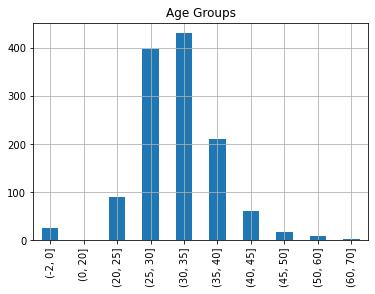

In [30]:
# adding binned version of age to data frame
df_2020['AgeGroup'] = pd.cut(df_2020.Age, bins=[-2,0,20,25,30,35,40,45,50,60,70])
df_2020.AgeGroup.value_counts().sort_index().plot(kind='bar')
plt.title('Age Groups')
plt.grid()
plt.show()

# (-2, 0) indicates missing values

### Univariate analysis of Categorical Features

In [31]:
# change plot style
plt.style.use('dark_background')

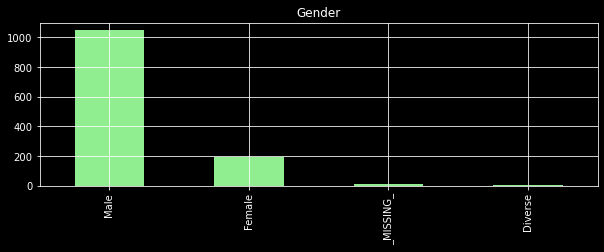

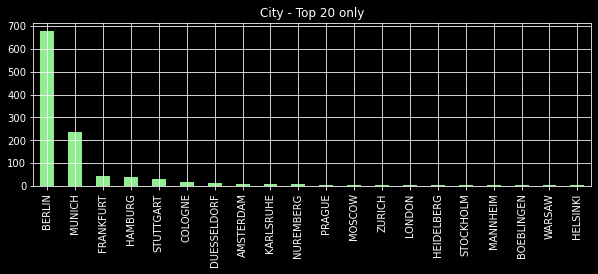

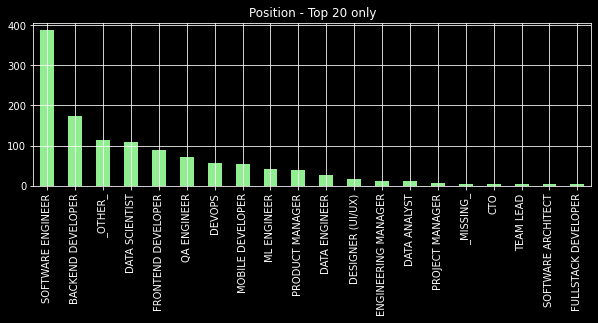

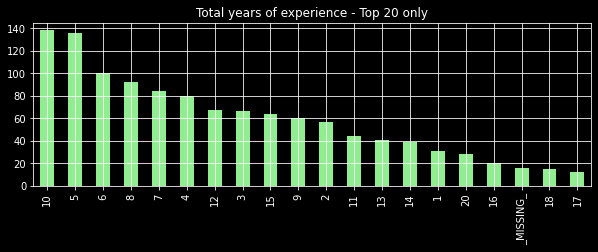

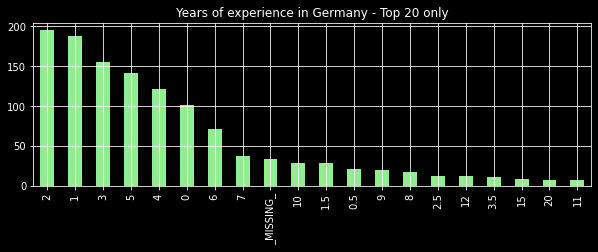

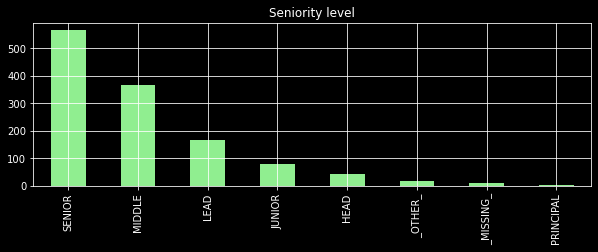

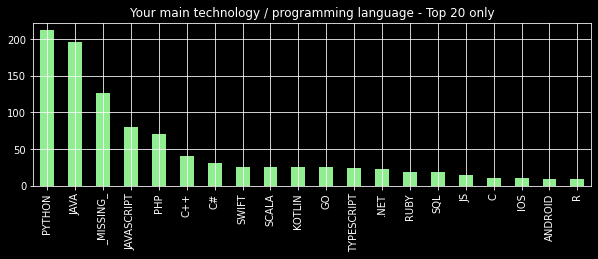

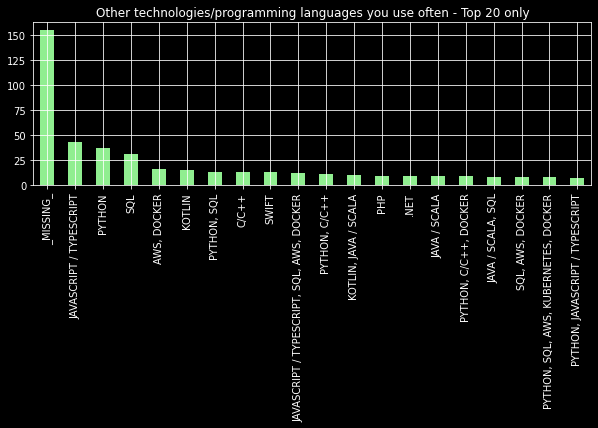

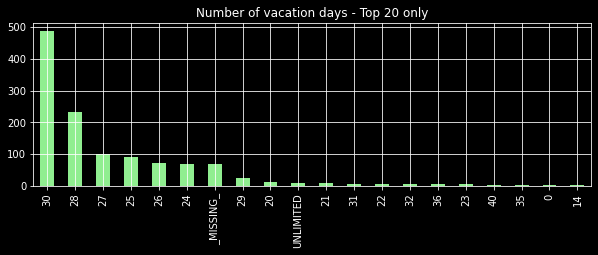

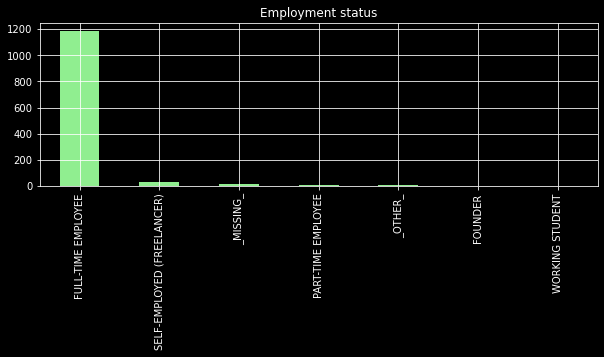

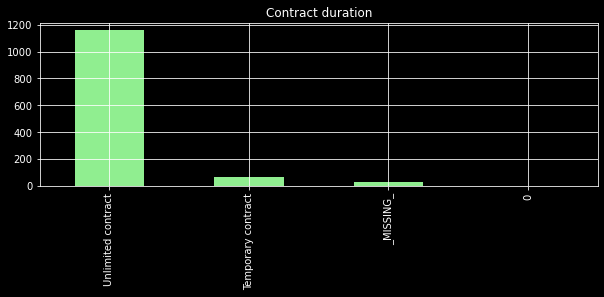

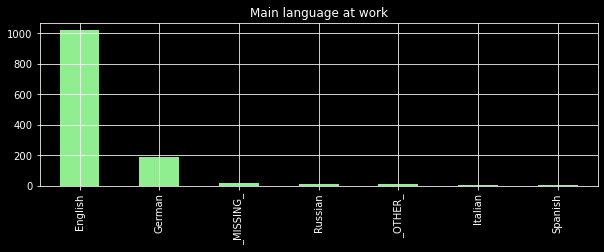

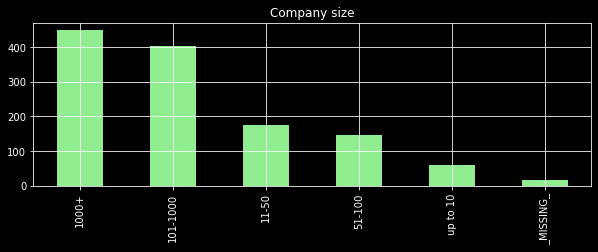

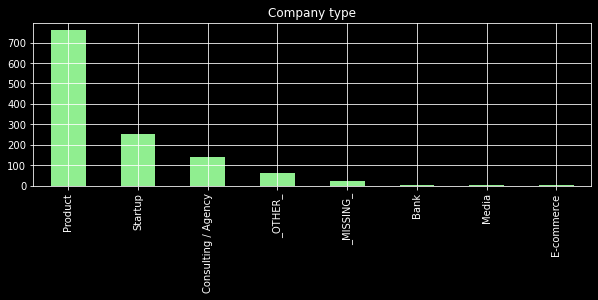

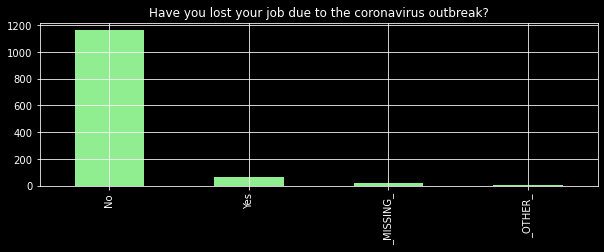

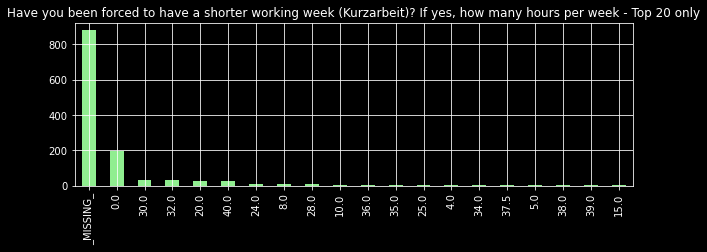

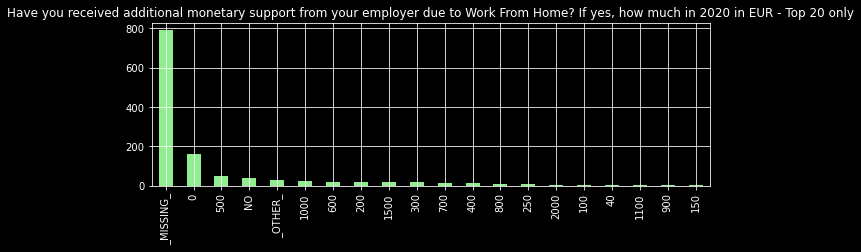

In [32]:
# plot distributions of categorical features
for f in features_cat:
    plt.figure(figsize=(10,3))
    val = df_2020[f].value_counts()
    if len(val) <= 20:
        val.plot(kind='bar', color='lightgreen')
        plt.title(f)
    else: # if more than 20 levels show only the most frequent 20
        val[0:20].plot(kind='bar', color='lightgreen')
        plt.title(f + ' - Top 20 only')
        
    plt.grid()
    plt.show()

## After watching above plots we can make hypothesis --
### a) that most people are working in IT Industry are man,
### b) most active IT sector is in Berlin followed by Munich and others in Germany,
### c) Number are jobs maximum for software developers, Back end developer followed by Data Scientists,
### d) Most used programming languages/technology use in industry are Java, Python, Javascript, SQL ,
### e) 30 days of vacation are provided by most of the comapnies followed by 28,
### f) Most comapnies are of product type and company size are more than 1000 or between 100-1000
### g) We can see that people working in IT sector were not that much affected by covid in terms of their job,
### h) most used lanuage at work is ENGLISH followed by german.

### Univariate analysis of numerical features

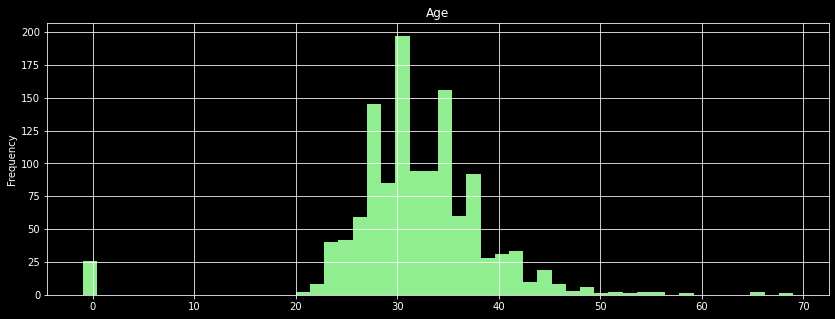

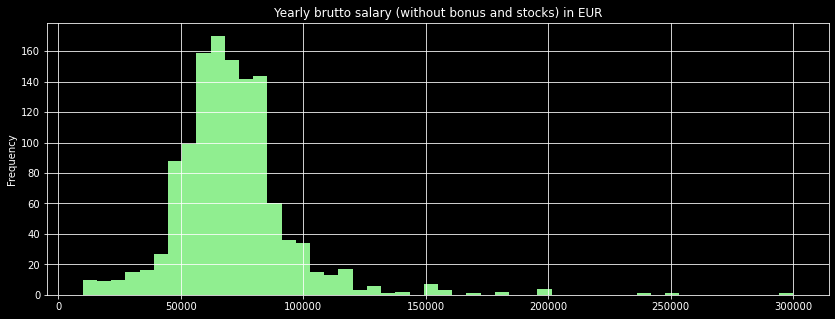

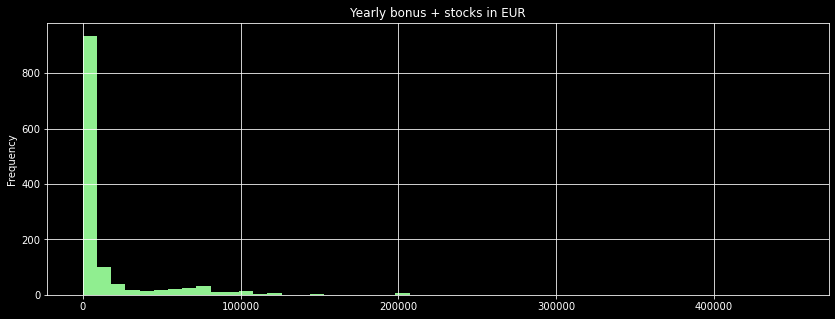

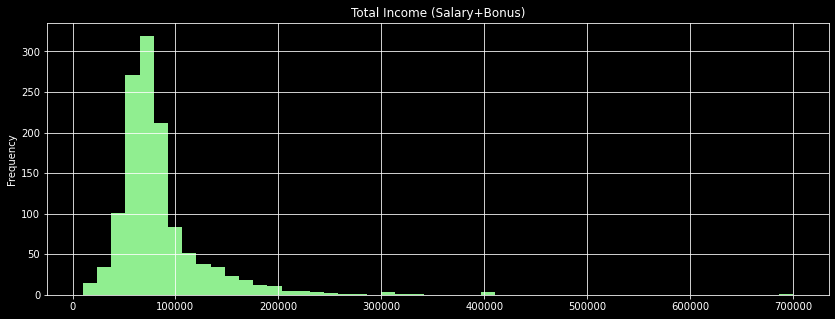

In [33]:
# plot distributions of numerical features
for f in features_num:
    plt.figure(figsize=(14,5))
    df_2020[f].plot(kind='hist', bins = 50, color='lightgreen')
    plt.title(f)
    plt.grid()
    plt.show()


## Bivariate analysis
# Salary vs. Features

In [34]:
# salary stats
df_2020['Yearly brutto salary (without bonus and stocks) in EUR'].describe()

count      1250.000000
mean      71032.281704
std       24340.674268
min       10001.000000
25%       58200.000000
50%       70000.000000
75%       80000.000000
max      300000.000000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

In [35]:
# total income stats
df_2020['Total Income (Salary+Bonus)'].describe()

count      1250.000000
mean      84227.804464
std       45789.994371
min       10001.000000
25%       60000.000000
50%       73750.000000
75%       91000.000000
max      700000.000000
Name: Total Income (Salary+Bonus), dtype: float64

In [36]:
# change plot style again to default
plt.style.use('default')

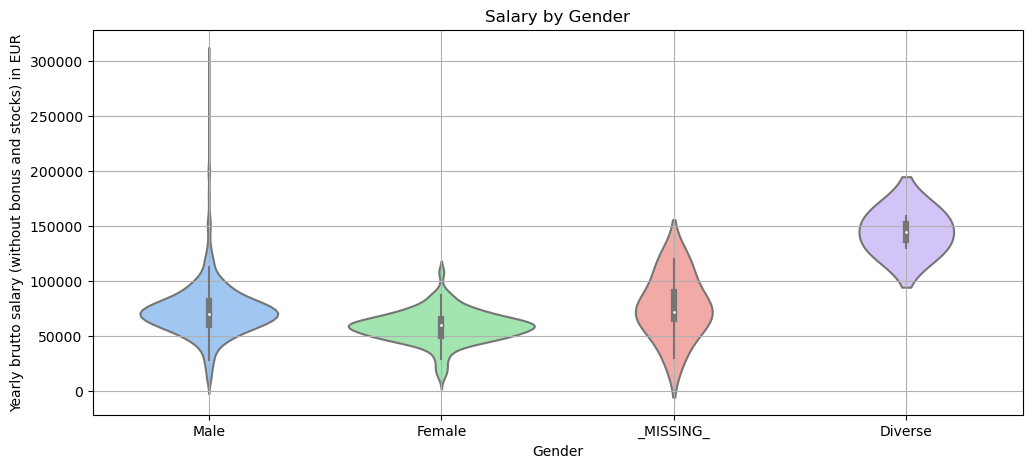

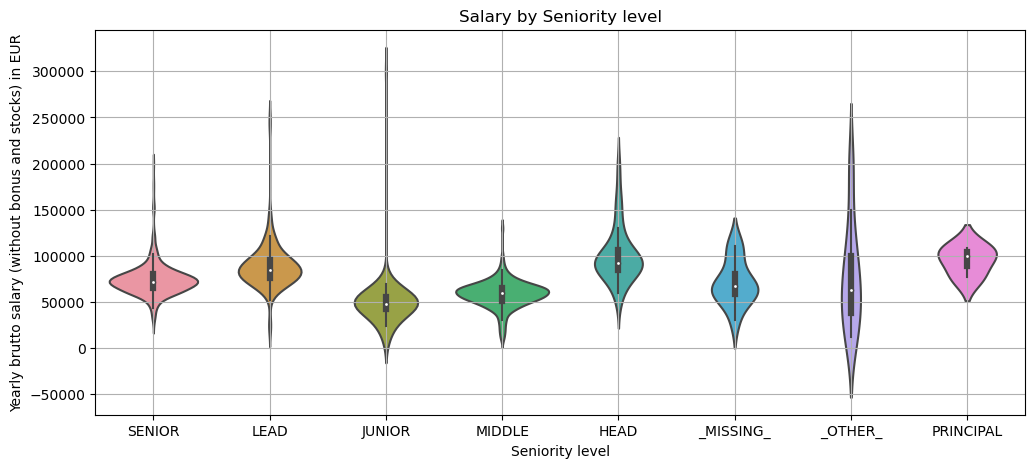

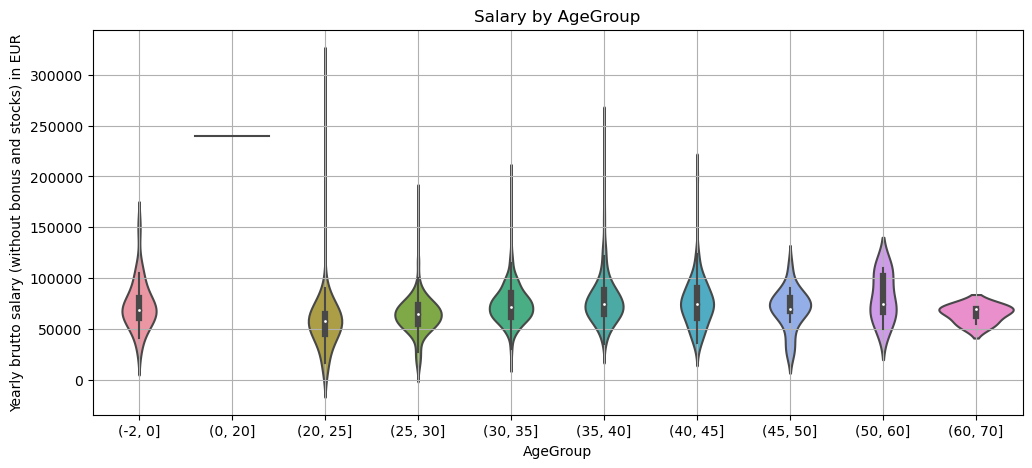

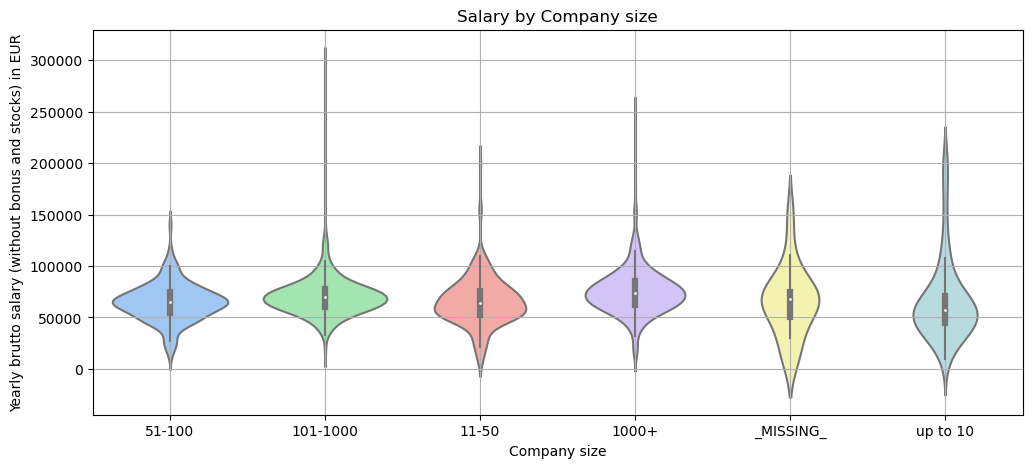

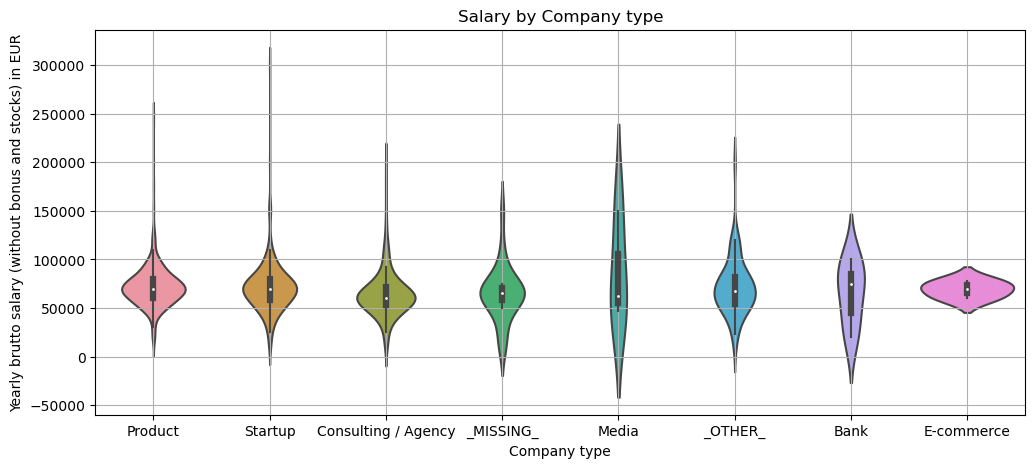

In [37]:
# violinplots show dependency of salary on the following features:
my_features = ['Gender', 'Seniority level', 'AgeGroup', 'Company size', 'Company type']

for f in my_features:
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,5))
    sns.violinplot(data=df_2020, x=f, y='Yearly brutto salary (without bonus and stocks) in EUR')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.show()

## Hypothesis we can create from above visualisations -- 
### a) Male generally have little higher average salary ass compared to others,
### b) people at head or principal position have quite higher salaries as compared to others,
### c) form age group 25-45 salary range is quite common,
### d) most stable salary is provide by company having no. o employes greater than 1000, followd by 101-1000,
### e) mot range of salaries is in media feild, and the highest salary is for startup company

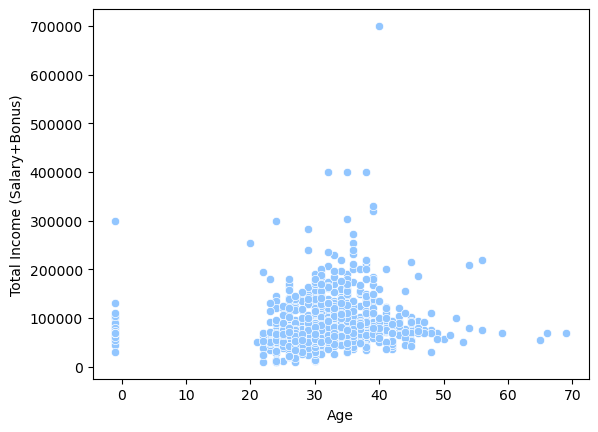

In [39]:
sns.scatterplot(x = df_2020['Age'], y = df_2020['Total Income (Salary+Bonus)'])
plt.show()

### From the above graph we can conclude that age from 20-40 have highest total incomes

## Multivariate Analysis

In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

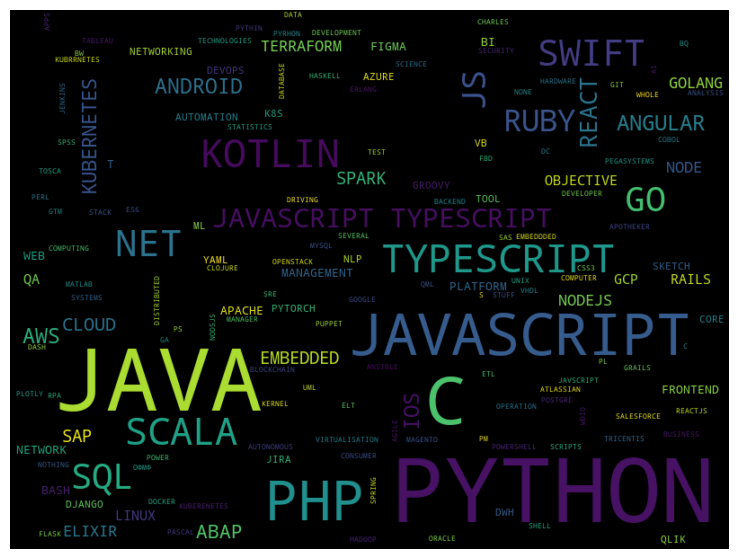

In [44]:
# create wordcloud fpr main tech/progamming language
f = 'Your main technology / programming language'
text_select = df_2020[f][df_2020[f] != '_MISSING_']
text = " ".join(txt for txt in text_select)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### From diagram we can see that main languages used at work are Python, Java, C

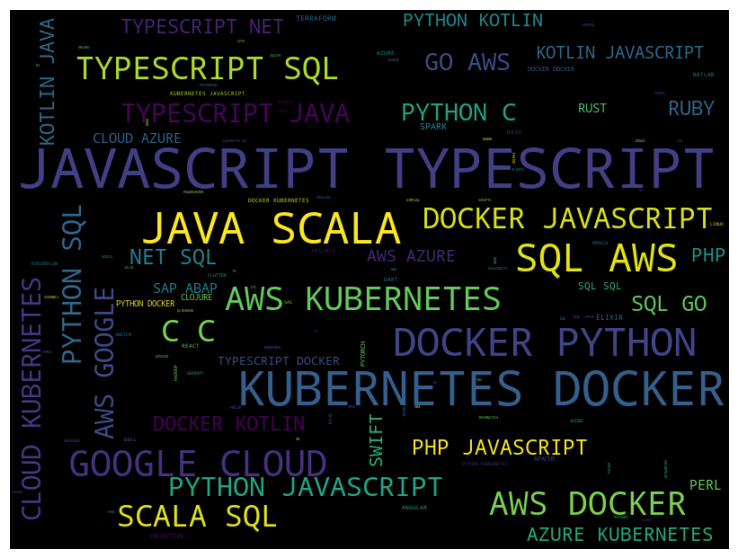

In [45]:

f = 'Other technologies/programming languages you use often'
text_select = df_2020[f][df_2020[f] != '_MISSING_']
text = " ".join(txt for txt in text_select)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, max_font_size=100, max_words=500,
                      width = 800, height = 600,
                      background_color='black').generate(text)

plt.figure(figsize=(11,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### From diagram we can see that most famous secondary languages/technology are Javascript, Typescript, Kubernetes, Docker

## Data Scientist - Job Breakdown

In [50]:
df_ds = df_2020[df_2020.Position=='DATA SCIENTIST'].copy()
df_ds

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",Total Income (Salary+Bonus),AgeGroup
35,24/11/2020 11:28:14,33.0,Male,BERLIN,DATA SCIENTIST,5,4,LEAD,PYTHON,"PYTHON, R, GOOGLE CLOUD, DOCKER",...,FULL-TIME EMPLOYEE,Unlimited contract,English,1000+,Product,No,0.0,1,230000.0,"(30, 35]"
66,24/11/2020 11:38:15,32.0,Male,BERLIN,DATA SCIENTIST,10,10,HEAD,_MISSING_,_MISSING_,...,FULL-TIME EMPLOYEE,Unlimited contract,English,1000+,Consulting / Agency,No,_MISSING_,_MISSING_,140000.0,"(30, 35]"
79,24/11/2020 11:44:02,26.0,Female,MUNICH,DATA SCIENTIST,6,2,MIDDLE,PYTHON,"PYTHON, C/C++, SQL, DOCKER",...,FULL-TIME EMPLOYEE,Unlimited contract,English,1000+,Product,No,_MISSING_,_MISSING_,70000.0,"(25, 30]"
88,24/11/2020 11:46:16,24.0,Male,BERLIN,DATA SCIENTIST,4,2,SENIOR,PYTHON,"PYTHON, AWS, DOCKER",...,FULL-TIME EMPLOYEE,Unlimited contract,English,101-1000,Startup,No,0.0,_MISSING_,146000.0,"(20, 25]"
90,24/11/2020 11:46:42,29.0,Male,BERLIN,DATA SCIENTIST,4,4,SENIOR,PYTHON,"SQL, AWS, DOCKER",...,FULL-TIME EMPLOYEE,Unlimited contract,English,101-1000,Product,No,_MISSING_,300,81000.0,"(25, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,13/12/2020 21:23:15,37.0,Female,BERLIN,DATA SCIENTIST,7,2,HEAD,PYTHON,"SQL, AWS, DOCKER, MATLAB",...,FULL-TIME EMPLOYEE,Unlimited contract,English,11-50,Startup,No,0.0,NO,91000.0,"(35, 40]"
1160,14/12/2020 09:03:54,30.0,Male,BERLIN,DATA SCIENTIST,4.5,2.5,MIDDLE,PYTHON,"PYTHON, SQL, AWS, DOCKER",...,FULL-TIME EMPLOYEE,Unlimited contract,English,51-100,Startup,No,30.0,_MISSING_,70000.0,"(25, 30]"
1186,21/12/2020 23:41:56,38.0,Male,BERLIN,DATA SCIENTIST,6,3,LEAD,PYTHON,"R, AWS",...,FULL-TIME EMPLOYEE,Unlimited contract,English,1000+,Product,No,_MISSING_,_MISSING_,180000.0,"(35, 40]"
1211,29/12/2020 23:57:42,29.0,Male,MUNICH,DATA SCIENTIST,6,5,MIDDLE,SQL,PYTHON,...,FULL-TIME EMPLOYEE,Unlimited contract,English,1000+,Product,No,_MISSING_,300,100000.0,"(25, 30]"


In [51]:
# DS total income stats
df_ds['Total Income (Salary+Bonus)'].describe()

count       110.000000
mean      88782.727273
std       48397.570564
min       24000.000000
25%       58000.000000
50%       75000.000000
75%      104250.000000
max      300000.000000
Name: Total Income (Salary+Bonus), dtype: float64

In [52]:
# DS age stats (excluding missings)
age4stats_DS = df_ds['Age'][df_ds['Age']>0] # filter "NAs" first
age4stats_DS.describe()

count    107.000000
mean      31.112150
std        4.411236
min       24.000000
25%       28.000000
50%       30.000000
75%       34.500000
max       45.000000
Name: Age, dtype: float64

### We can see that average salary is a bit higher for Data Scientists whereas average age is a little bit lower than in the overall "population". However, we have to be careful as our sample of Data Scientists is rather small (110 observations).

In [54]:
# change plot style
plt.style.use('dark_background')

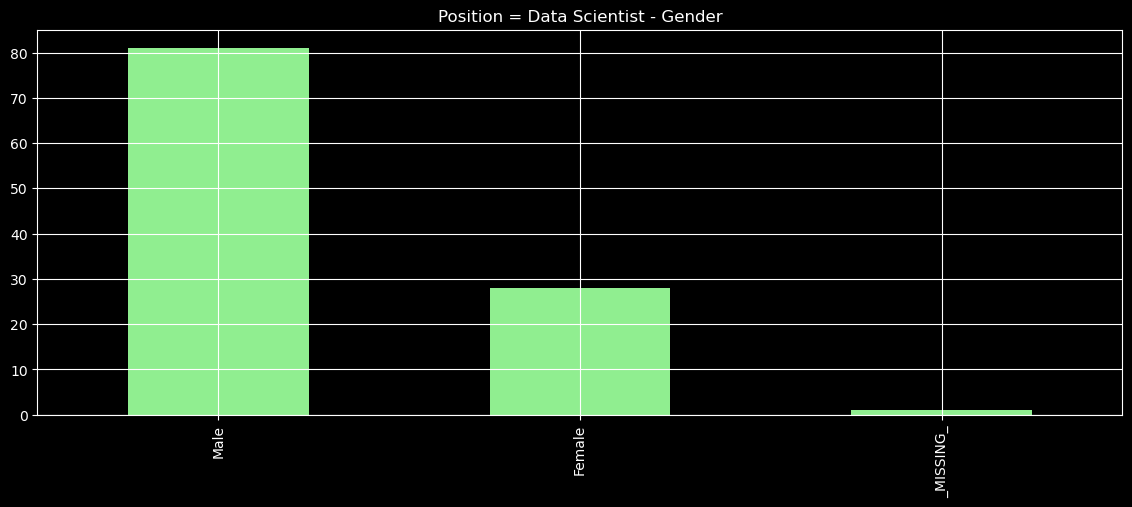

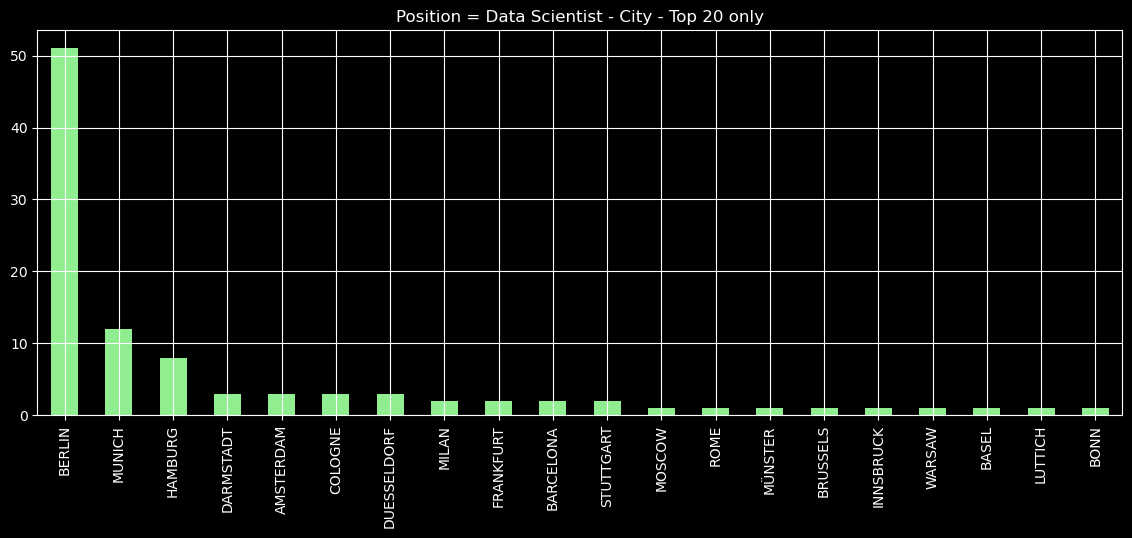

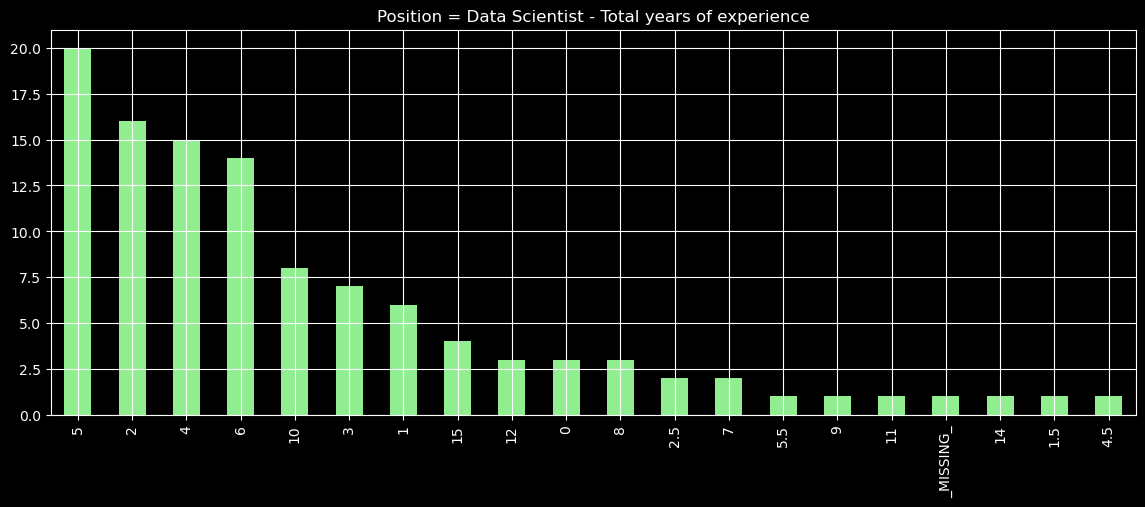

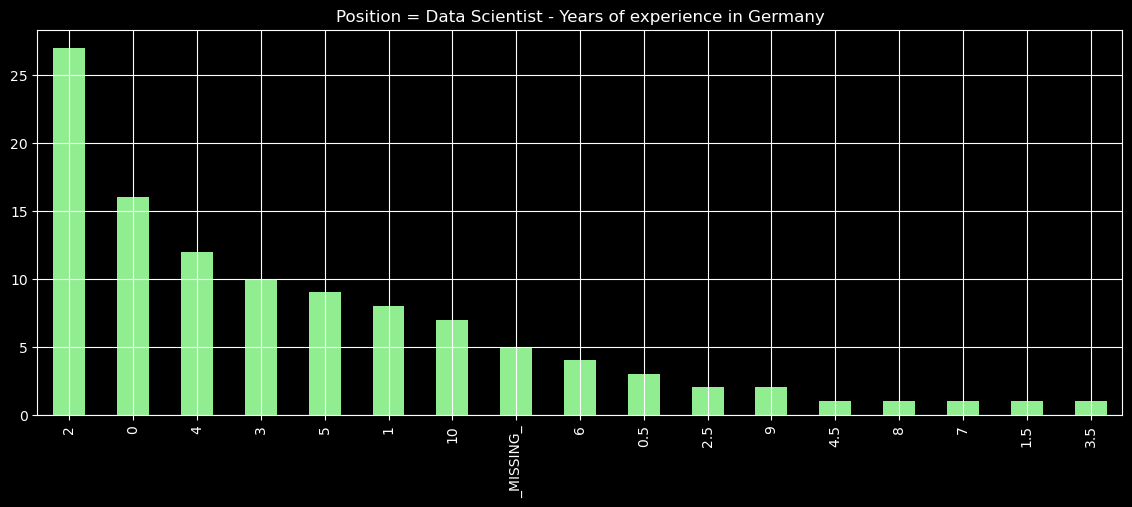

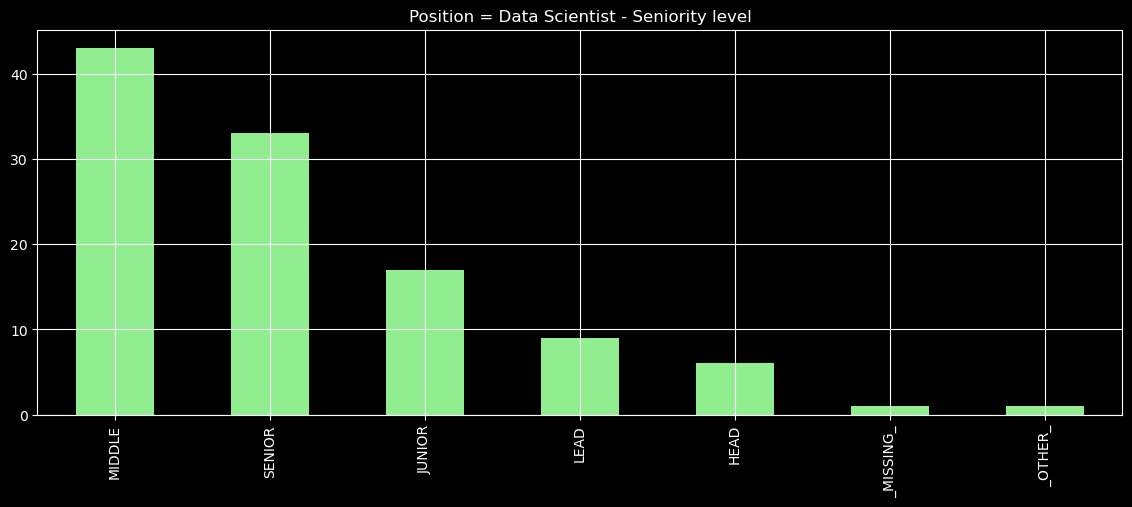

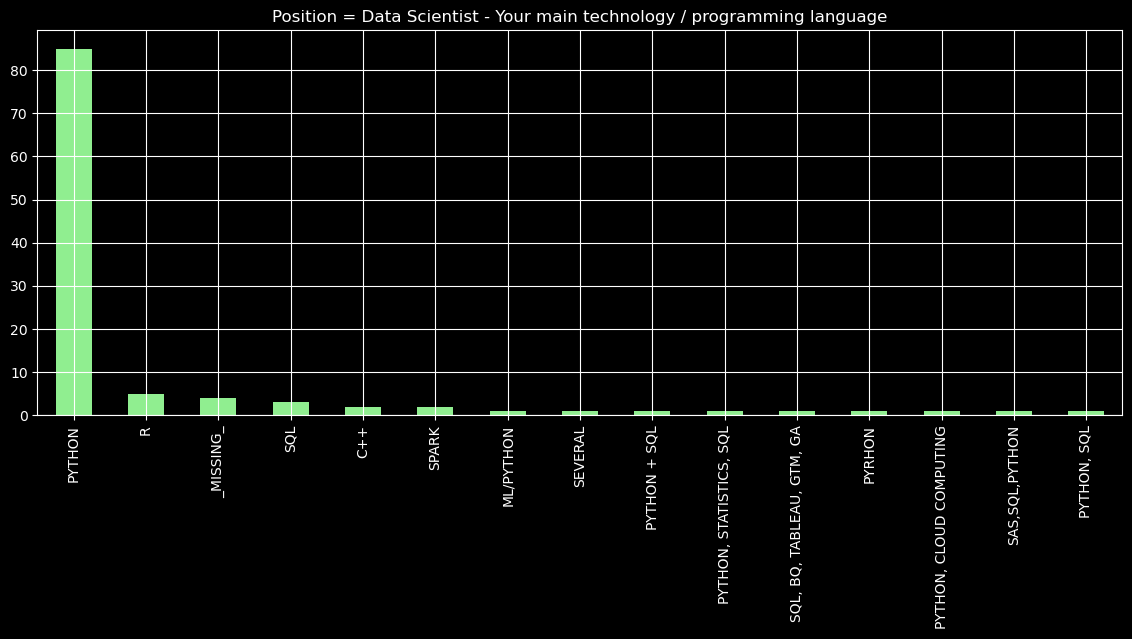

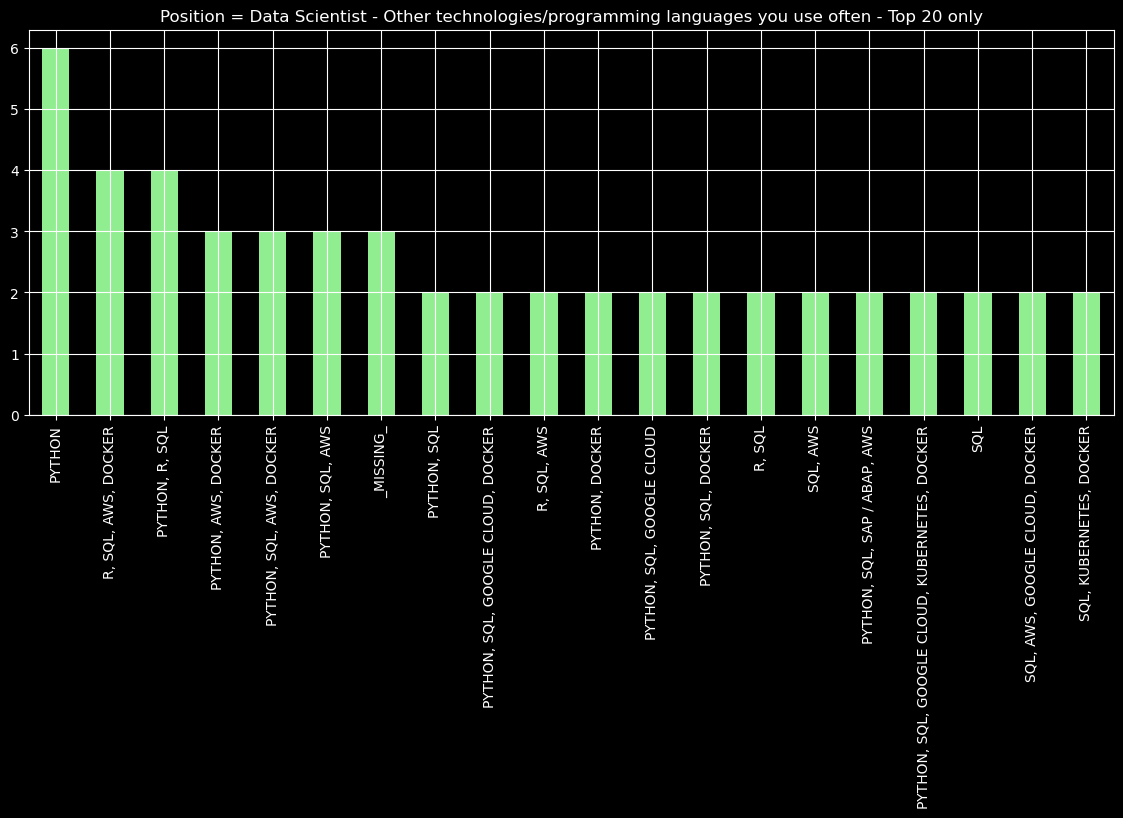

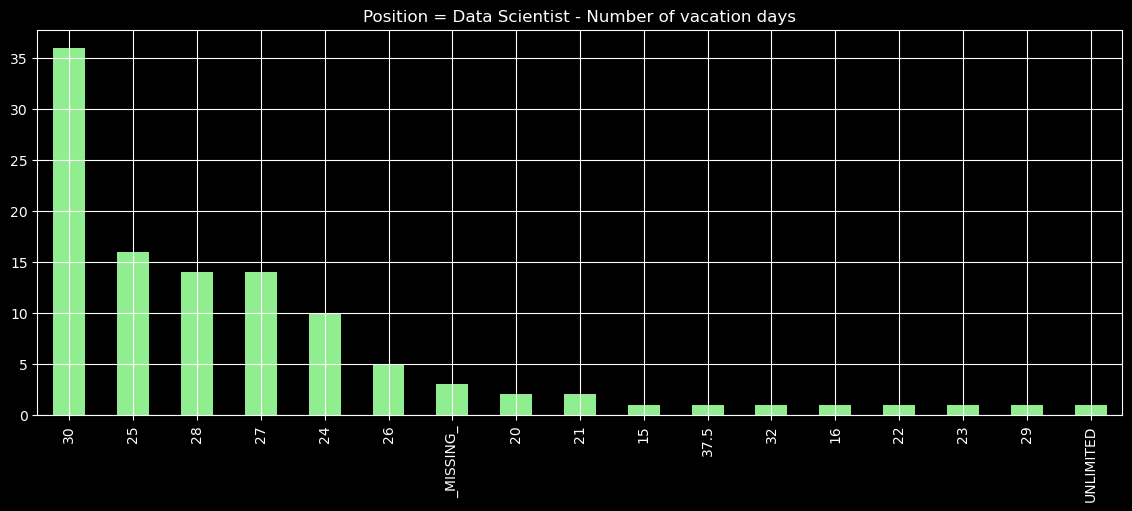

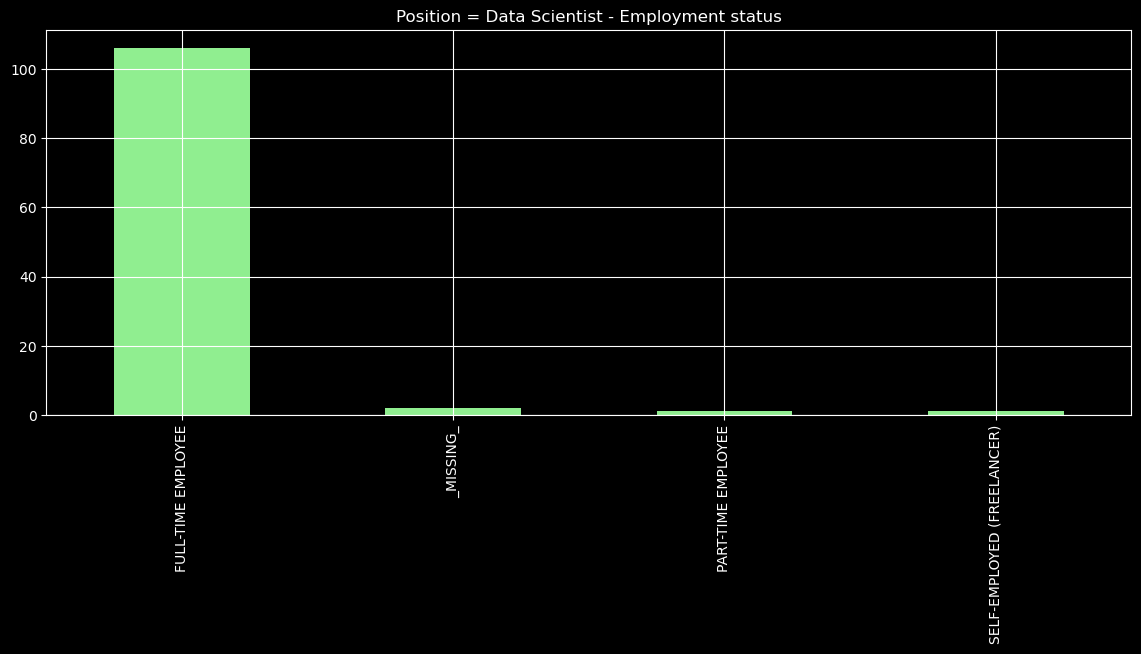

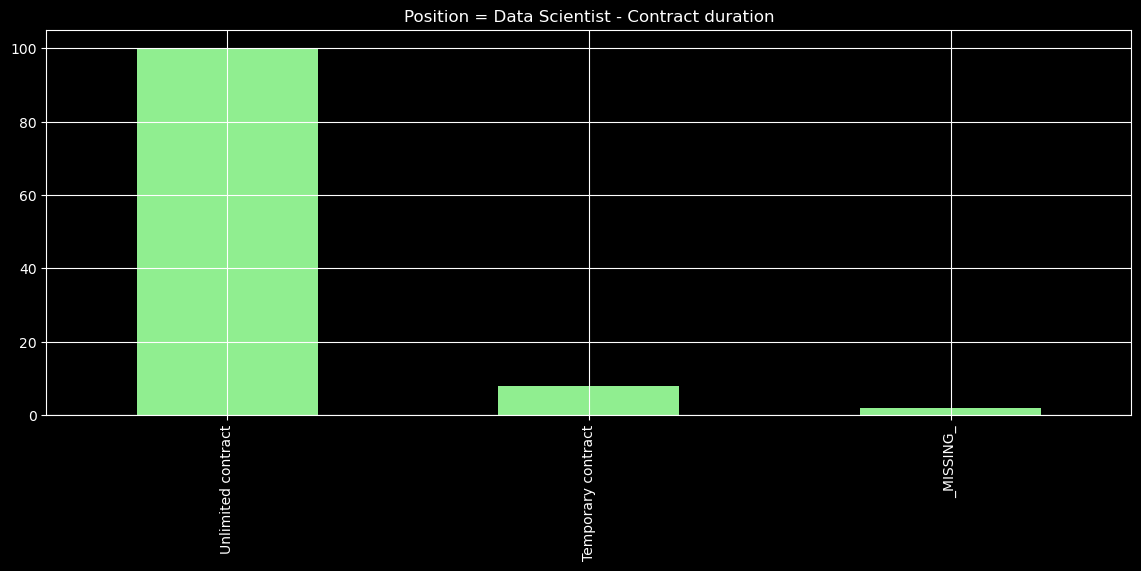

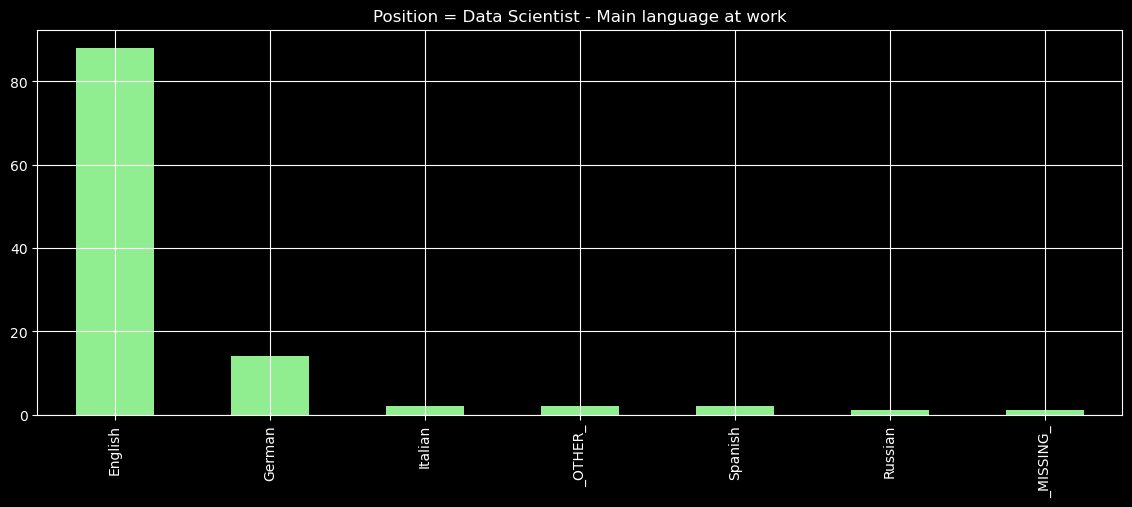

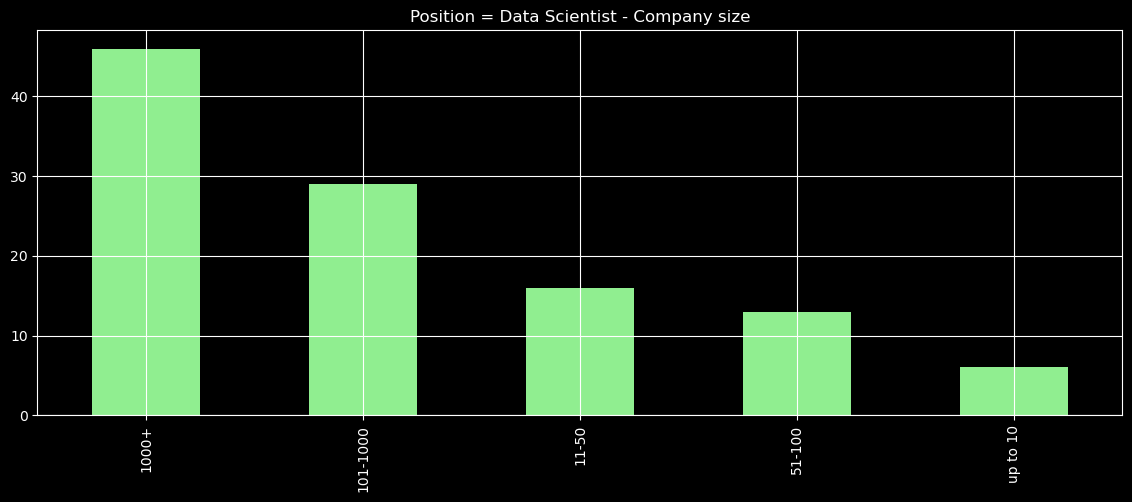

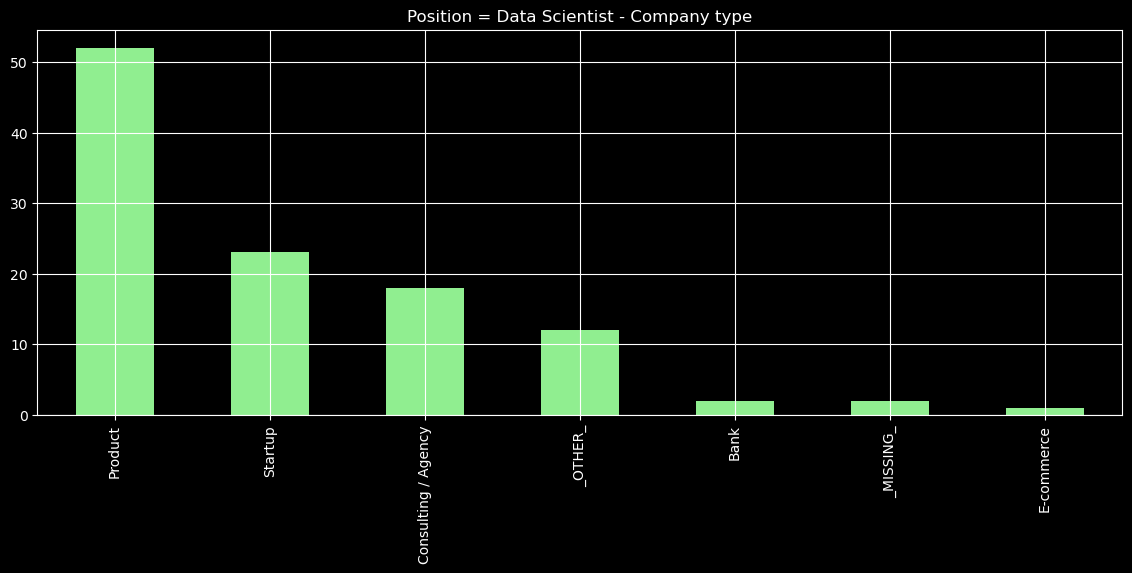

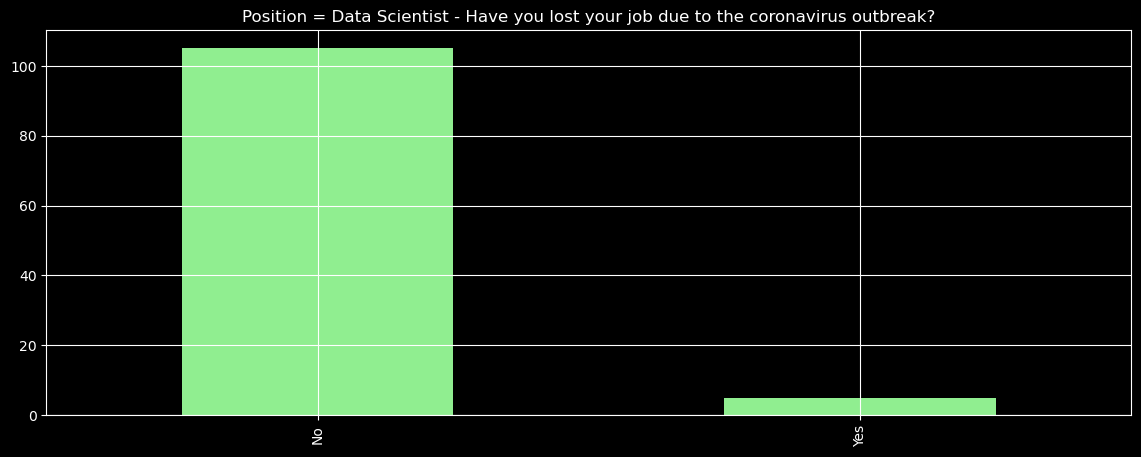

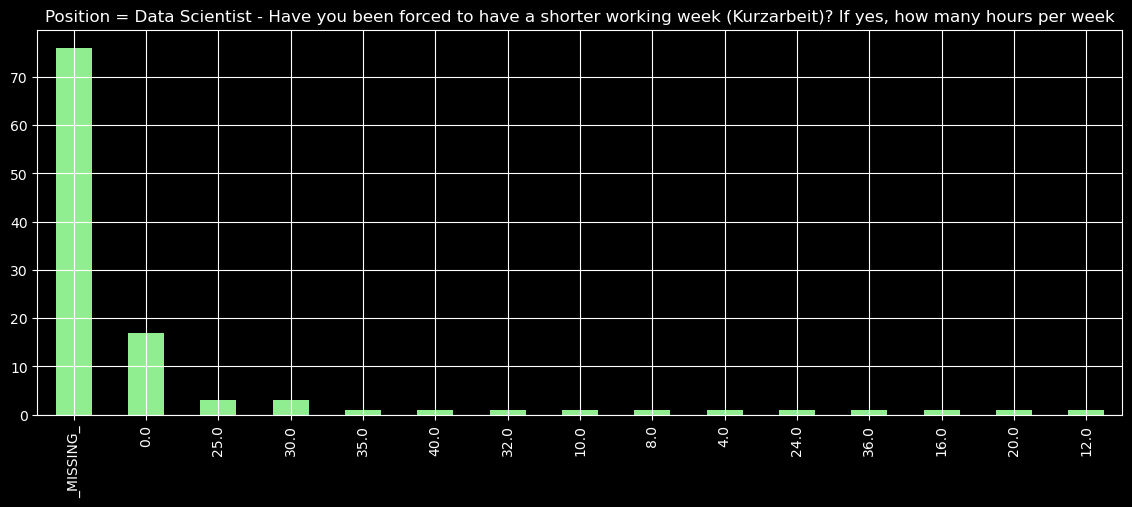

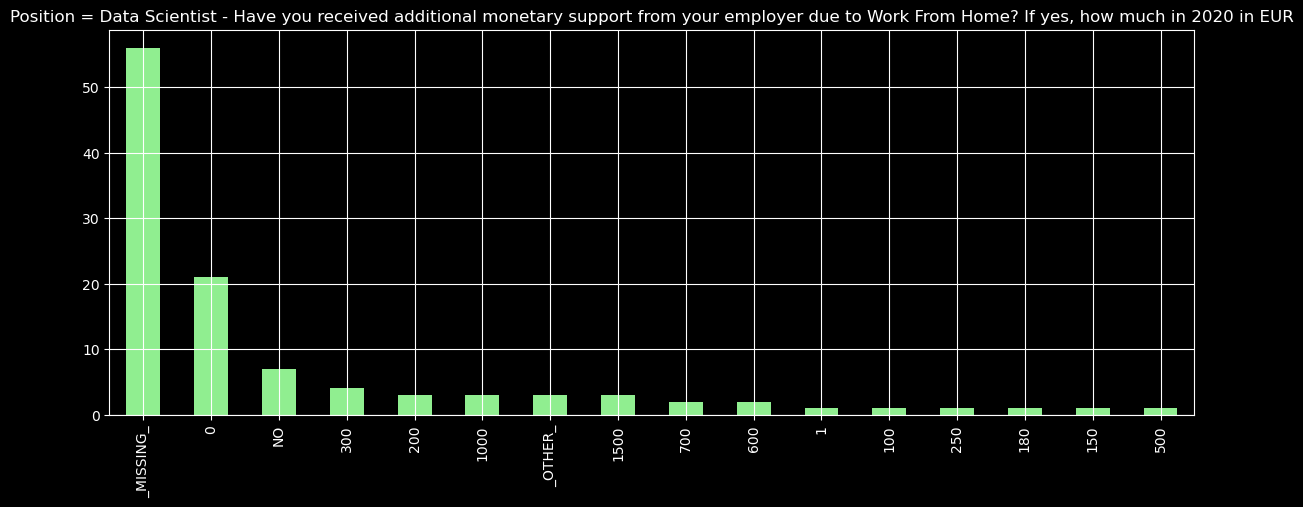

In [55]:
# plot distributions of categorical features (exclude Position)
features_cat_x = features_cat.copy()
features_cat_x.remove('Position')

for f in features_cat_x:
    plt.figure(figsize=(14,5))
    val_c = df_ds[f].value_counts()
    if len(val_c) <= 20:
        val_c.plot(kind='bar', color='lightgreen')
        plt.title('Position = Data Scientist - ' + f)
    else: # if more than 20 levels show only the most frequent 20
        val_c[0:20].plot(kind='bar', color='lightgreen')
        plt.title('Position = Data Scientist - ' + f + ' - Top 20 only')
        
    plt.grid()
    plt.show()

## From above analysis we can be sure that data scientist is one of the best jobs people can have in this era. It not only provides very good salary but also have good security and other features like having more vacation and more freedom in the job.
## Python, R, SQL, AWS, Docker are languages which are demanded most for this job.